In [1]:
import os

from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.onprem.database import Cockroachdb
from diagrams.gcp.analytics import PubSub
from diagrams.gcp.devtools import Scheduler
from diagrams.gcp.compute import Functions

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

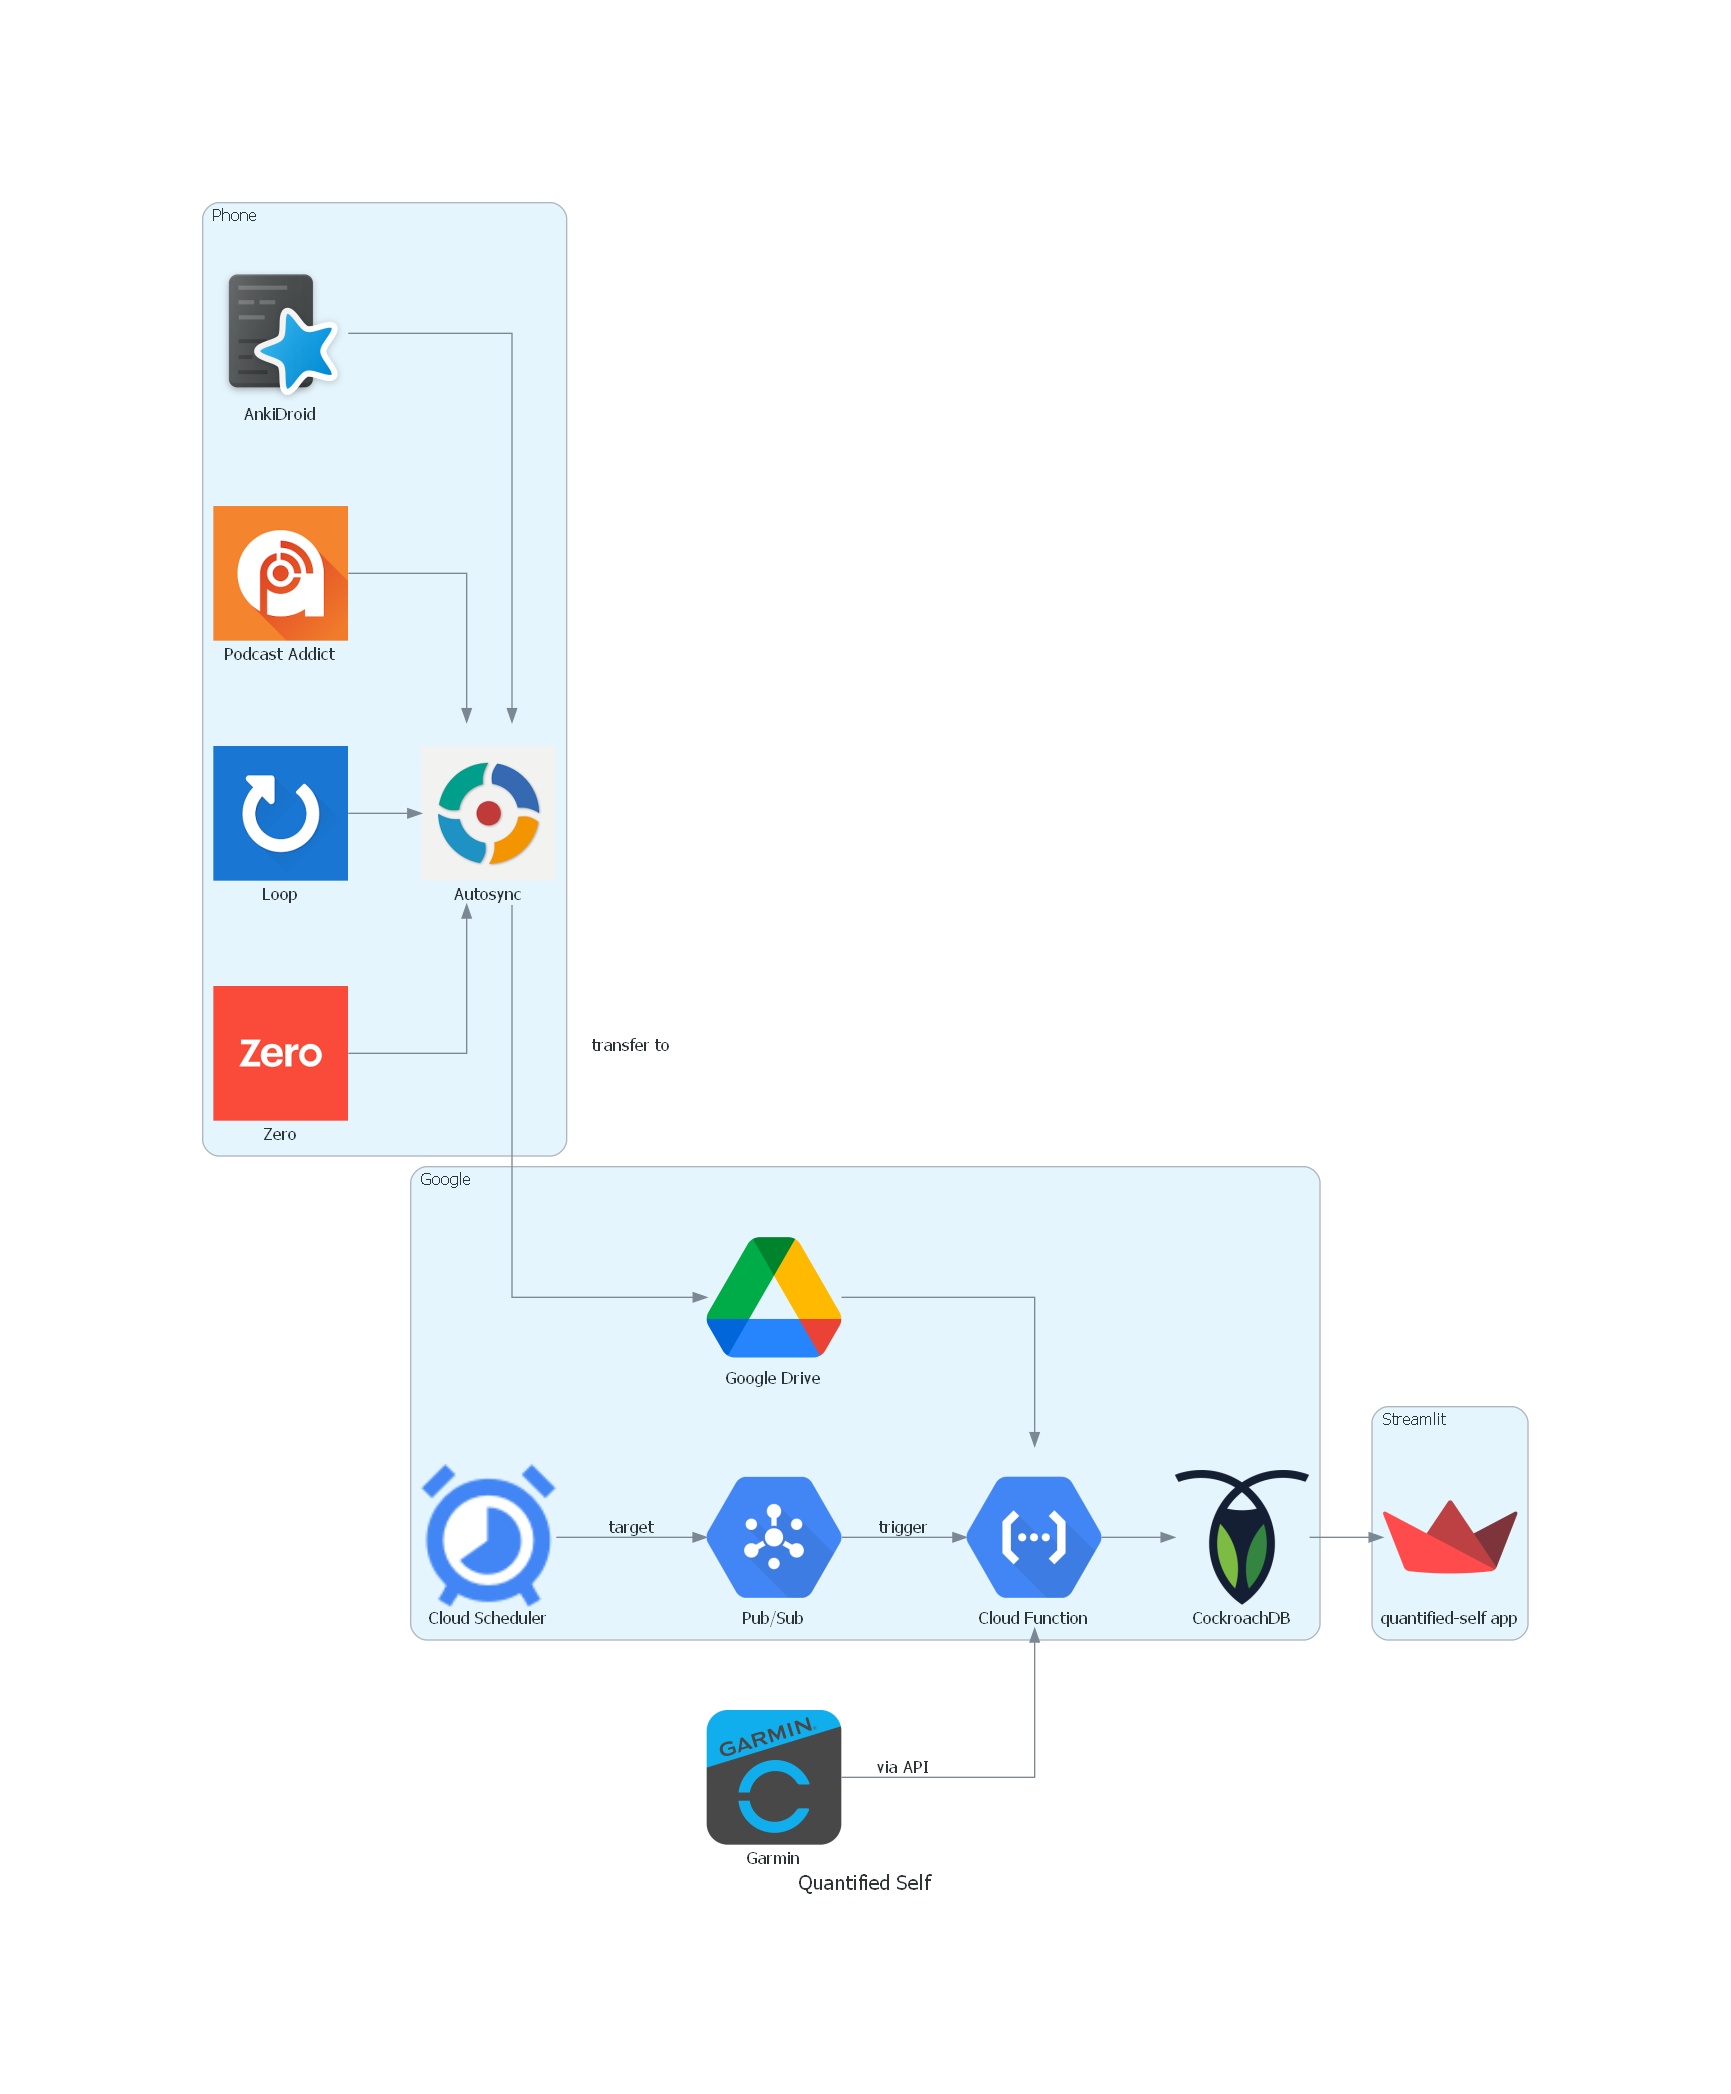

In [2]:
with Diagram('Quantified Self', show=False, direction='LR') as diag:
    with Cluster('Phone'):
        # Nodes
        anki = Custom("AnkiDroid", 'logo/anki.png')
        podcast_addict = Custom('Podcast Addict', 'logo/podcast_addict.png')
        loop = Custom('Loop', 'logo/loop.png')
        zero = Custom('Zero', 'logo/zero.png')
        autosync = Custom('Autosync', 'logo/autosync.png')
        
        # Edges
        anki >> autosync
        podcast_addict >> autosync
        loop >> autosync
        zero >> autosync 
    
    
    with Cluster('Google'):
        # Nodes
        google_drive = Custom('Google Drive', 'logo/google_drive.png')
        scheduler = Scheduler('Cloud Scheduler')
        pubsub = PubSub('Pub/Sub')
        function = Functions("Cloud Function")
        cockroachdb = Cockroachdb('CockroachDB')
        
        # Edges
        scheduler >> Edge(label='target') >> pubsub
        pubsub >> Edge(label='trigger') >> function
        autosync >> Edge(label='transfer to') >> google_drive >> function
        function >> cockroachdb
    
    garmin = Custom('Garmin', 'logo/garmin.png')
    garmin >> Edge(label='via API') >> function
    
    with Cluster('Streamlit'):
        streamlit  = Custom('quantified-self app', 'logo/streamlit.png')
    
    cockroachdb >> streamlit
    
diag

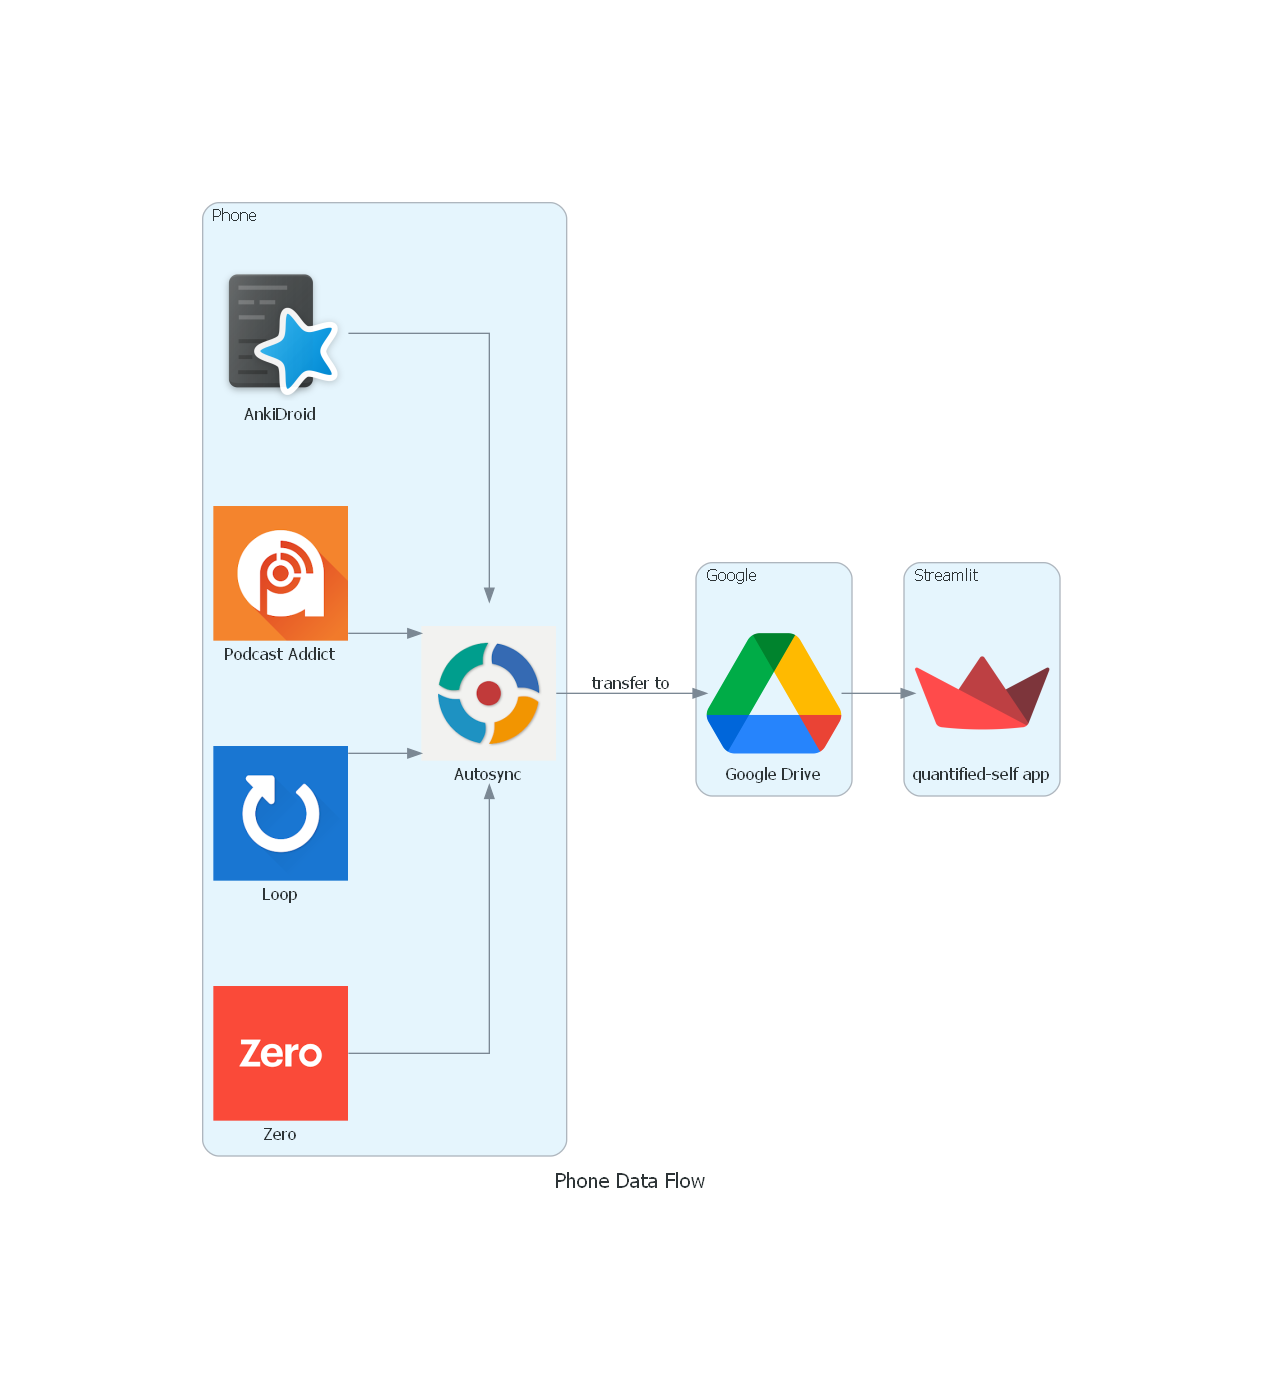

In [20]:
with Diagram('Phone Data Flow', show=False, direction='LR') as diag:
    with Cluster('Phone'):
        # Nodes
        anki = Custom("AnkiDroid", 'logo/anki.png')
        podcast_addict = Custom('Podcast Addict', 'logo/podcast_addict.png')
        loop = Custom('Loop', 'logo/loop.png')
        zero = Custom('Zero', 'logo/zero.png')
        autosync = Custom('Autosync', 'logo/autosync.png')
        
        # Edges
        anki >> autosync
        podcast_addict >> autosync
        loop >> autosync
        zero >> autosync 
    
    with Cluster('Google'):
        google_drive = Custom('Google Drive', 'logo/google_drive.png')
    autosync >> Edge(label='transfer to') >> google_drive 
    
    with Cluster('Streamlit'):
        streamlit  = Custom('quantified-self app', 'logo/streamlit.png')
    
    google_drive >> streamlit
    
diag

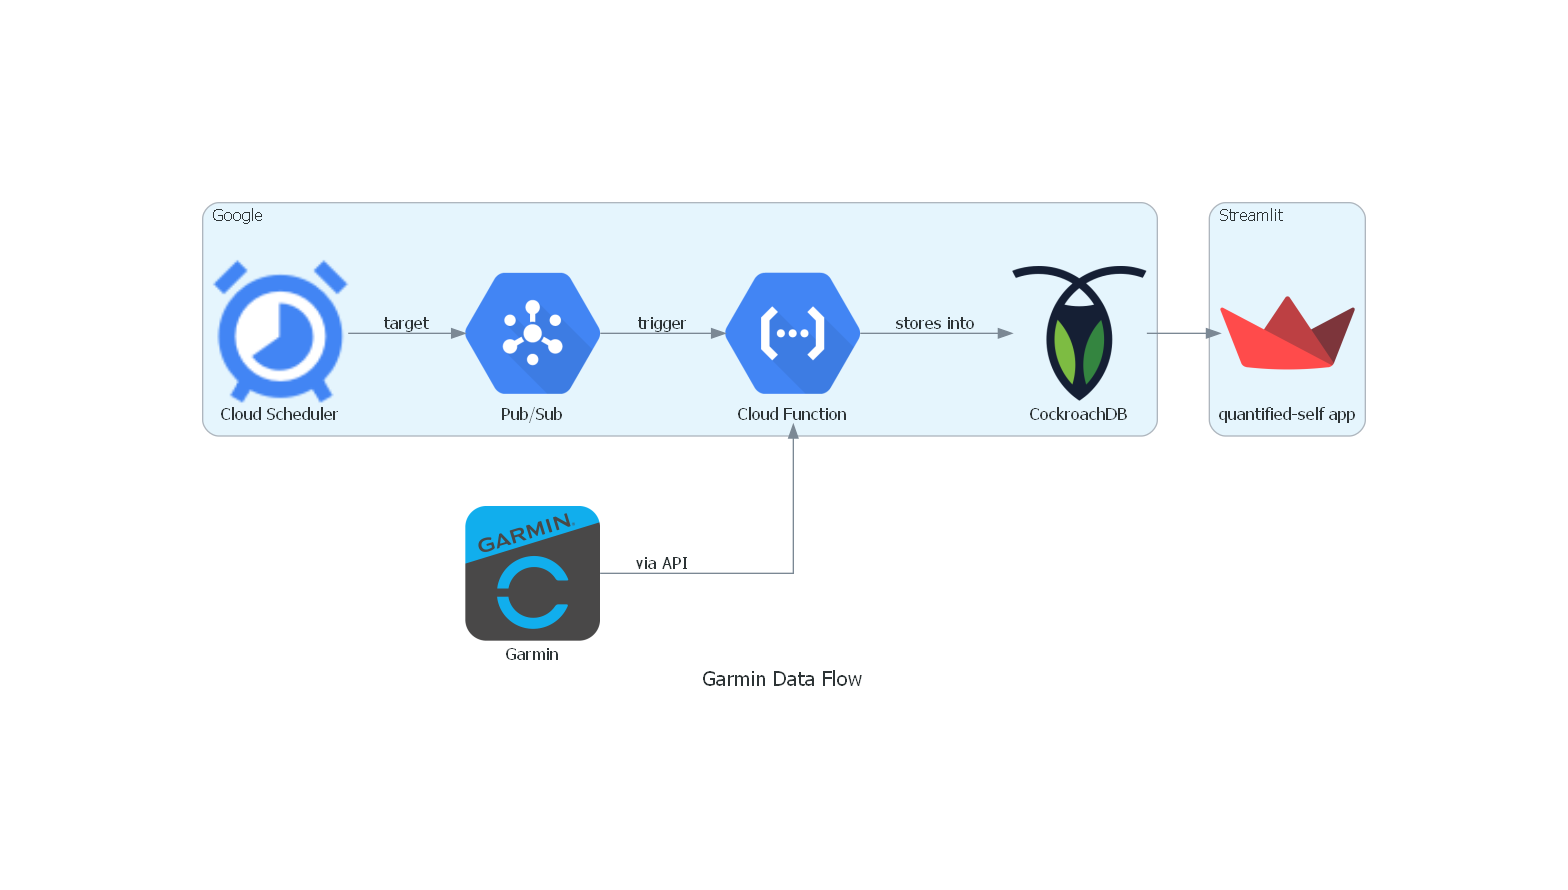

In [22]:
with Diagram('Garmin Data Flow', show=False, direction='LR') as diag:
    
    with Cluster('Google'):
        # Nodes
        scheduler = Scheduler('Cloud Scheduler')
        pubsub = PubSub('Pub/Sub')
        function = Functions("Cloud Function")
        cockroachdb = Cockroachdb('CockroachDB')
        
        # Edges
        scheduler >> Edge(label='target') >> pubsub
        pubsub >> Edge(label='trigger') >> function
        function >> Edge(label='stores into') >> cockroachdb
    
    garmin = Custom('Garmin', 'logo/garmin.png')
    garmin >> Edge(label='via API') >> function
    
    with Cluster('Streamlit'):
        streamlit  = Custom('quantified-self app', 'logo/streamlit.png')
    
    cockroachdb >> streamlit
    
diag